# Verarbeitung

## Numpy Grundlagen

### Elementzugriff
Schreiben Sie eine Funktion, die zwei 1D numpy Arrays mit jeweils drei Elementen entgegen nimmt und das Kreuzprodukt berechnet. Verwenden Sie nicht die numpy Funktion fürs Kreuzprodukt und verlassen Sie die Schleife, falls die Vektoren die falsche Form haben.

In [12]:
import numpy as np
def kreuzprodukt(a1, a2):
    if np.shape(a1) != (3,) or np.shape(a2) != (3,):
        pass
    produkt = np.zeros(3)
    produkt[0] = a1[1]*a2[2] - a1[2]*a2[1]
    produkt[1] = a1[2]*a2[0] - a1[0]*a2[2]
    produkt[2] = a1[0]*a2[1] - a1[1]*a2[0]
    return produkt

### Array Manipulation
Schreiben Sie eine Funktion, die zwei eindimensionale numpy Arrays entgegen nimmt, diese in einem 2D Array speichert und dieses zurück gibt.

In [ ]:
import numpy as np

def array_kombinieren(a1, a2):
    c = np.array([a1, a2])
    return c

### Öffnen von Dateien
Schreiben Sie zwei Funktionen, die den Namen einer-csv Datei übergeben bekommen und die Datei öffnen und den Inhalt als numpy Array zurück geben. Verwenden sie einmal open und einmal numpy.loadtxt() um die Datei auszulesen. Sie können zum Testen eine der csv-Dateien aus den regulären Übungsaufgaben verwenden

In [2]:
import numpy as np

# Das öffnen mit open ist flexibler, da es unabhängig von der Formatierung der Datei funktioniert, solange man
# die Formatierung kennt. Allerdings muss man es jedes mal selbst programmieren und man hat schnell Fehler 
# eingebaut.
def oeffnen_mit_open(datei_name):
    datei = open(datei_name, 'r')
    daten = []
    for zeile in datei:
        zeile_liste = zeile.split(',')             # Liste von Strings aller Elemente einer Zeile
        for i in range(len(zeile_liste)):
            zeile_liste[i] = float(zeile_liste[i]) # Konvertierung in Floats
        daten.append(zeile_liste)
    return np.array(daten)                         # Konvertierung in Array

def oeffnen_mit_numpy(datei):
    return(np.loadtxt(datei, delimiter=','))

### Rotationsmatrix
Eine Matrix in 3 Dimensionen, die einen Vektor um den Winkel a um die x-Achse rotiert hat die Form: [[1, 0, 0], [0, cos a, -sin a], [0, sin a, cos a]]. Schreiben Sie eine Funktion, die einen Vektor und einen Winkel entgegen nimmt und den Vektor mit der gegebenen Matrix um den Winkel rotiert. Die Drehmatrix wird dazu von vorne mit dem Vektor multipliziert.

In [3]:
import numpy as np

def rotation_3d_vektor(vektor, winkel):
    rotationsmatrix = np.array([[1, 0, 0], 
                                [0, np.cos(winkel), -np.sin(winkel)], 
                                [0, np.sin(winkel), np.cos(winkel)]])
    return np.dot(rotationsmatrix, vektor) 

### Masken
Schreiben Sie eine Funktion, die alle negativen Elemente eines übergebenen Arrays addiert.

In [4]:
import numpy as np

# Masken sind hilfreich, wenn man logische Operationen auf alle Elemente eines Arrays anwenden will
# Sie sind ein Array mit den gleichen Dimensionen wie das ursprüngliche Array mit 0 dort, wo der logische 
# Ausdruck False und 1 wo er True war. Masken können direkt benutzt werden, um alle Elemente an den Stellen der
# Einsen zu referenzieren
def summe_negativer_elemente(array):
    maske = array<0
    summe = np.sum(array[maske])
    return summe

### Refferenzen
Schreiben Sie eine Funktion, die ein Array entgegen nimmt. Das zurück gegebene Array soll identisch zu diesem sein, nur dass das erste und letzte Element getauscht sind. Kontrollieren Sie Ihr Ergebnis, indem Sie die beiden Arrays vergleichen.

In [5]:
import numpy as np

# Intuitiver aber falscher Ansatz:
def tausche_elemente_falsch(array):
    array_neu = array
    array_neu[0] = array[-1]
    array_neu[-1] = array[0]
    return array

array = np.array([5,1,2])
array2 = tausche_elemente_falsch(array)
print('Bei der ersten Methode tauscht sich sowohl das übergebene, als auch das zurück gegebene Array,',  
      'da array_neu das gleiche Array referenziert wie array.')
print(array, array2)

# Ansatz mit kopiertem Array
def tausche_elemente_kopie(array):
    array_neu = np.copy(array)
    array_neu[0] = array[-1]
    array_neu[-1] = array[0]
    return array_neu

array = np.array([5,1,2])
array2 = tausche_elemente_kopie(array)
print('Die zweite Methode ist die richtige Lösung mit einer Kopie des Arrays.')
print(array, array2)

# Ansatz mit Tauschen der Elemente des uebergebnen Arrays
def tausche_elemente_in_place(array):
    element = array[0]
    array[0] = array[-1]
    array[-1] = element
    
array = np.array([5,1,2])
tausche_elemente_in_place(array)
print('Man kann die Referenz auch bewusst nutzen, um das übergebene Array direkt zu ändern.',
      'Allerdings führt dies schnell zu Problemen und sollte in der Regel vermieden werden.')
print(array)

Bei der ersten Methode tauscht sich sowohl das übergebene, als auch das zurück gegebene Array, da array_neu das gleiche Array referenziert wie array.
[2 1 2] [2 1 2]
Die zweite Methode ist die richtige Lösung mit einer Kopie des Arrays.
[5 1 2] [2 1 5]
Man kann die Referenz auch bewusst nutzen, um das übergebene Array direkt zu ändern. Allerdings führt dies schnell zu Problemen und sollte in der Regel vermieden werden.
[2 1 5]


## Mittelwert und Standardabweichung

### Schleifen
Berechnen Sie den Mittelwert durch eine for Schleife für:

$lst = [1,2,3,4,5,6,7,8,9,10]$

In [6]:
lst = [1,2,3,4,5,6,7,8,9,10]

s = 0
for i in lst:
    s += i
    
M = s/len(lst)
M

5.5

### Numpy array

Konvertieren Sie die Liste vom Letzten Abschnitt zu einem numpy Array. Berechnen Sie den
Mittelwert sowie die Standardabweichung mithilfe von `np.sum()` und dem `shape`-Attribut von numpy arrays.

In [7]:
import numpy as np

arr = np.array(lst)
print(arr)

M = np.sum(arr)/arr.shape[0]
print(M)

Std = np.sqrt(np.sum((arr-M)**2)/arr.shape[0])
print(Std)

[ 1  2  3  4  5  6  7  8  9 10]
5.5
2.8722813232690143


### Random numpy array

Generieren Sie ein random array mit 10 Integers, zwischen 0 und 100. Berechnen Sie den Mittelwert 
und Standard Abweichung durch `np.mean()` und `np.std()`.

Sie können `np.random.randint(a, b, size)` verwenden, um size Zufallszahlen zwischen a und b zu generieren.

In [8]:
from numpy import random

arr = random.randint(100, size=10)
print(arr)

M = np.mean(arr)
print(M)

Std = np.std(arr)
print(Std)

[84 80 70 42 11 48 35 96 55  6]
52.7
28.764735354249304


### Multi-D numpy array

Berechnen Sie den Mittelwert und Standard Abweichung für jede Zeile des gegeben Arrays.

`arr = np.array([[3,5,4,6],[9,5,1,7],[4,8,6,2]])`

In [9]:
arr = np.array([[3,5,4,6],[9,5,1,7],[4,8,6,2]])

for row in arr:
    print('M:',np.mean(row),'\t', 'Std', np.std(row))

M: 4.5 	 Std 1.118033988749895
M: 5.5 	 Std 2.958039891549808
M: 5.0 	 Std 2.23606797749979


In [10]:
print('M:',arr.mean(axis=1))
print('Std',arr.std(axis=1))

M: [4.5 5.5 5. ]
Std [1.11803399 2.95803989 2.23606798]


### Random und Multi-D array

* `np.random.seed()`  setzt einen Startpunkt für die Berechnung der Zufallszahlen. Der selbe Algorithmus wird beim gleichen Startpunkt immer die gleichen Zufallszahlen generieren.
* `np.random.uniform(a, b, size)` generiert ein numpy Array mit float Zufallszahlen zwischen a und b. An `size` kann ein Tuple übergeben, wenn ein mehrdimensionales Array erstellt werden soll.

Nehmen Sie `x = np.linspace(0, 30, 30)` als $x$ Werte der Datenpunkte. Generieren Sie ein random multi-D Array von floats zwischen $-10$ und $10$ mit $30$ Zeilen und $5$ Spalten. Benutzen Sie $21$ als seed Zahl, damit jedes Mal die gleiche Zahlen generiert werden.

Berechnen Sie für jede Reihe den Mittelwert und die Standartabweichung und plotten Sie diese in ein Diagram. Benutzen Sie [`plt.fill_between()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) um die Standartabweichung als Band um den Mittelwertgraphen zu plotten.

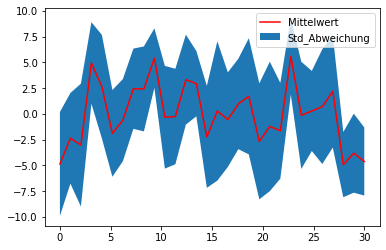

In [11]:
import matplotlib.pyplot as plt
x = np.linspace(0, 30, 30)

np.random.seed(21)
arr = np.random.uniform(low=-10, high=10, size=(30, 5))   

y_mean = []
for row in arr:
    y_mean.append(np.mean(row))

y_std = []
for row in arr:
    y_std.append(np.std(row))
    
#List comprehension

y_std_unten = [m - n for m, n in zip(y_mean, y_std)] 
y_std_oben = [m + n for m, n in zip(y_mean, y_std)]

#Plotten

plt.plot(x, y_mean, 'r-', label='Mittelwert')
plt.fill_between(x, y_std_unten, y_std_oben, label='Std_Abweichung')
plt.legend()
plt.show()